In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Sales_Data_Zone_Wise 

In [2]:
df = pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


### Mean Sales of each Zone

In [4]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


**Mean Sales of each zone is**

|Zone||Mean Sales|
|----||---|
|Zone-A||1540493|
|Zone-B||1755560|
|Zone-C||1772871|
|Zone-D||1842927|

### Total sales generated by all the zones for each month

In [5]:
df['Total_sales_per_month']=df.sum(numeric_only=True,axis=1)

In [6]:
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_sales_per_month
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


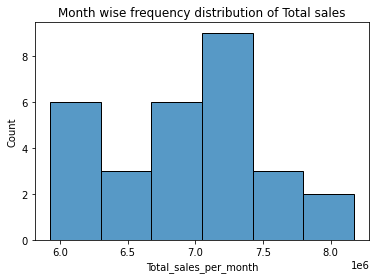

In [25]:
sns.histplot(x='Total_sales_per_month',data=df)
plt.title('Month wise frequency distribution of Total sales')
plt.show()

In [27]:
df['Total_sales_per_month'].describe()

count    2.900000e+01
mean     6.911851e+06
std      5.908919e+05
min      5.925424e+06
25%      6.506659e+06
50%      7.032783e+06
75%      7.155515e+06
max      8.174449e+06
Name: Total_sales_per_month, dtype: float64

**Insights:**

1. Mean total sales per month is 6506659

2. Minimum sales is 5925424 in month-13. Month-5 also has sales less than 6000000.

3. Almost seven months has a sale greater than 7200000. And highest sale was recorded in Month-4 (8174449).

4. Almost 7 months have sales between 7000000 and 7200000.

## Testing whether all the zones generate the same amount of sales 

### Preliminary analysis

Here different zones represent the explanatory variable (X) and here we have 4 zones ie; Zone-A, Zone-B, Zone-C and Zone-D. Sales amount is the response variable (Y)

In [8]:
za,zb,zc,zd=df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D']

In [9]:
df1=za.append(zb.append(zc.append(zd,ignore_index=True),ignore_index=True),ignore_index=True).to_frame()
df1.rename(columns={0:'Sales'},inplace=True)

In [10]:
for i in range(117):
    if i<29:
        df1.rename(index={i:'Zone-A'},inplace=True)
    elif i<58:
         df1.rename(index={i:'Zone-B'},inplace=True)
    elif i<87:
         df1.rename(index={i:'Zone-C'},inplace=True)
    else:
         df1.rename(index={i:'Zone-D'},inplace=True)


In [11]:
df1.reset_index(level=0,inplace=True)
df1

,index,Sales
0,Zone-A,1483525
1,Zone-A,1238428
2,Zone-A,1860771
3,Zone-A,1871571
4,Zone-A,1244922
...,...,...
111,Zone-D,1695122
112,Zone-D,1520406
113,Zone-D,1289160
114,Zone-D,2178267


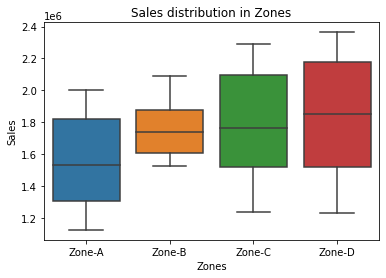

In [12]:
sns.boxplot(x='index',y='Sales',data=df1)
plt.xlabel('Zones')
plt.title('Sales distribution in Zones')
plt.show()

In [13]:
df1.groupby('index')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,
Zone-A,29.0,1.540493e+06,261940.061865,1128185.0,1305972.0,1534390.0,1820196.0,2004480.0
Zone-B,29.0,1.755560e+06,168389.885896,1527574.0,1606010.0,1740365.0,1875658.0,2091194.0
Zone-C,29.0,1.772871e+06,333193.724529,1237722.0,1523308.0,1767047.0,2098463.0,2290580.0
Zone-D,29.0,1.842927e+06,375016.479487,1234311.0,1520406.0,1854412.0,2180416.0,2364132.0


**Here from the above plot and summary statistics we can infer that Zone-C and Zone-D are almost same. But Zone-B is very much different. Zone-A is also different from all other zones**

### Testing Using ANOVA

**H0:Mean sales of all the four zones are equal.**

**H1: Mean sales of alteast one zone is significantly different**

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Sales ~ index', data=df1).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
index,3.0,1.483058e+12,4.943525e+11,5.672056,0.001183
Residual,112.0,9.761449e+12,8.715579e+10,NaN,NaN


**OR**

In [15]:
from scipy.stats import f_oneway

In [16]:
f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

From ANOVA test, p value is 0.001 which is very much less than 0.05. which implies we reject the null hypothesis.

We infer that sales among the Zones differ significantly. i.e; **Sales generated in each zones are different**